In [ ]:
from google.colab import files
uploaded = files.upload()

Saving classification_dataset-20251121T214335Z-1-001.zip to classification_dataset-20251121T214335Z-1-001.zip


In [ ]:
import zipfile
import os

# Unzip the file
zip_file = "classification_dataset-20251121T214335Z-1-001.zip"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('classification_dataset')

print("Unzipped successfully!")

# Check the folder structure
print("\nFolder structure:")
!ls classification_dataset/

Unzipped successfully!

Folder structure:
classification_dataset


In [ ]:
import os

# Check what's inside
print("Level 1:")
!ls classification_dataset/

print("\nLevel 2:")
!ls classification_dataset/classification_dataset/

Level 1:
classification_dataset

Level 2:
test  train  valid


In [ ]:
import shutil

# Move contents to a cleaner path
shutil.move('classification_dataset/classification_dataset', 'dataset')

# Verify the structure
print("Main folder:")
!ls dataset/

print("\nTRAIN folder:")
!ls dataset/train/

print("\nVALID folder:")
!ls dataset/valid/

print("\nTEST folder:")
!ls dataset/test/

Main folder:
test  train  valid

TRAIN folder:
bird  drone

VALID folder:
bird  drone

TEST folder:
bird  drone


In [ ]:
import os

dataset_path = 'dataset'

for split in ['train', 'valid', 'test']:
    print(f"\n{split.upper()}:")
    for cls in ['bird', 'drone']:
        path = os.path.join(dataset_path, split, cls)
        count = len(os.listdir(path))
        print(f"  {cls}: {count} images")



TRAIN:
  bird: 1414 images
  drone: 1248 images

VALID:
  bird: 217 images
  drone: 225 images

TEST:
  bird: 121 images
  drone: 94 images


CLASS IMBALANCE ANALYSIS

TRAIN:
  Bird:  1414 (53.1%)
  Drone: 1248 (46.9%)
  Ratio (Bird:Drone): 1.13:1

VALID:
  Bird:  217 (49.1%)
  Drone: 225 (50.9%)
  Ratio (Bird:Drone): 0.96:1

TEST:
  Bird:  121 (56.3%)
  Drone: 94 (43.7%)
  Ratio (Bird:Drone): 1.29:1


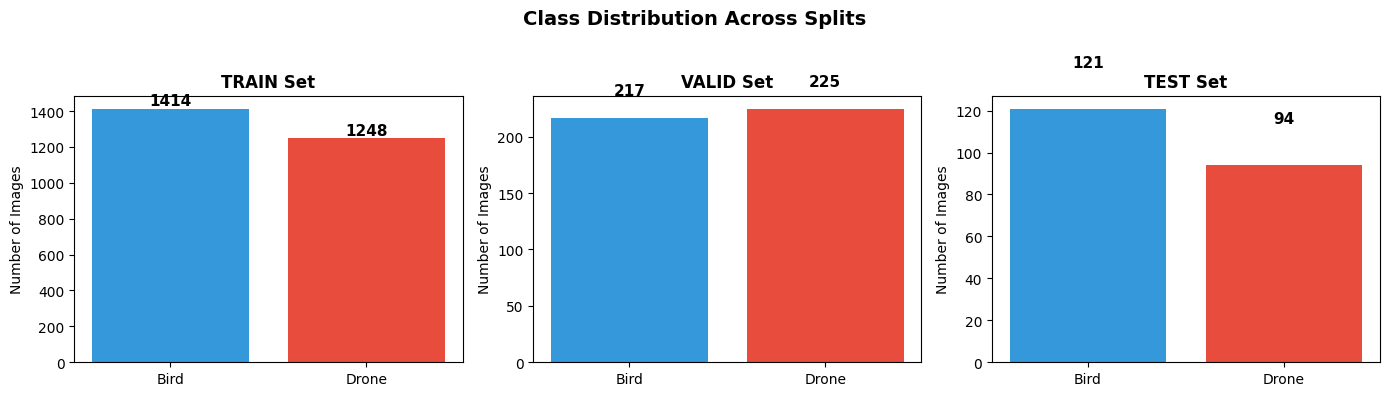


SUMMARY

Total Bird:  1752
Total Drone: 1567
Overall Ratio: 1.12:1

Imbalance Level: 5.6%
Assessment: ✅ MILD imbalance - No special handling needed


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Dataset counts
data = {
    'Split': ['TRAIN', 'TRAIN', 'VALID', 'VALID', 'TEST', 'TEST'],
    'Class': ['bird', 'drone', 'bird', 'drone', 'bird', 'drone'],
    'Count': [1414, 1248, 217, 225, 121, 94]
}

# Calculate imbalance
print("=" * 50)
print("CLASS IMBALANCE ANALYSIS")
print("=" * 50)

splits = ['TRAIN', 'VALID', 'TEST']
bird_counts = [1414, 217, 121]
drone_counts = [1248, 225, 94]

for i, split in enumerate(splits):
    total = bird_counts[i] + drone_counts[i]
    bird_pct = (bird_counts[i] / total) * 100
    drone_pct = (drone_counts[i] / total) * 100
    ratio = bird_counts[i] / drone_counts[i]

    print(f"\n{split}:")
    print(f"  Bird:  {bird_counts[i]} ({bird_pct:.1f}%)")
    print(f"  Drone: {drone_counts[i]} ({drone_pct:.1f}%)")
    print(f"  Ratio (Bird:Drone): {ratio:.2f}:1")

# Visualize
fig, axes = plt.subplots(1, 3, figsize=(14, 4))

colors = ['#3498db', '#e74c3c']

for i, split in enumerate(splits):
    counts = [bird_counts[i], drone_counts[i]]
    bars = axes[i].bar(['Bird', 'Drone'], counts, color=colors)
    axes[i].set_title(f'{split} Set', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Number of Images')

    # Add count labels on bars
    for bar, count in zip(bars, counts):
        axes[i].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 20,
                     str(count), ha='center', fontsize=11, fontweight='bold')

plt.suptitle('Class Distribution Across Splits', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Overall summary
print("\n" + "=" * 50)
print("SUMMARY")
print("=" * 50)
total_bird = sum(bird_counts)
total_drone = sum(drone_counts)
print(f"\nTotal Bird:  {total_bird}")
print(f"Total Drone: {total_drone}")
print(f"Overall Ratio: {total_bird/total_drone:.2f}:1")

# Imbalance assessment
imbalance = abs(total_bird - total_drone) / (total_bird + total_drone) * 100
print(f"\nImbalance Level: {imbalance:.1f}%")

if imbalance < 10:
    print("Assessment: ✅ MILD imbalance - No special handling needed")
elif imbalance < 20:
    print("Assessment: ⚠️ MODERATE imbalance - Consider class weights")
else:
    print("Assessment: ❌ SEVERE imbalance - Use class weights or oversampling")

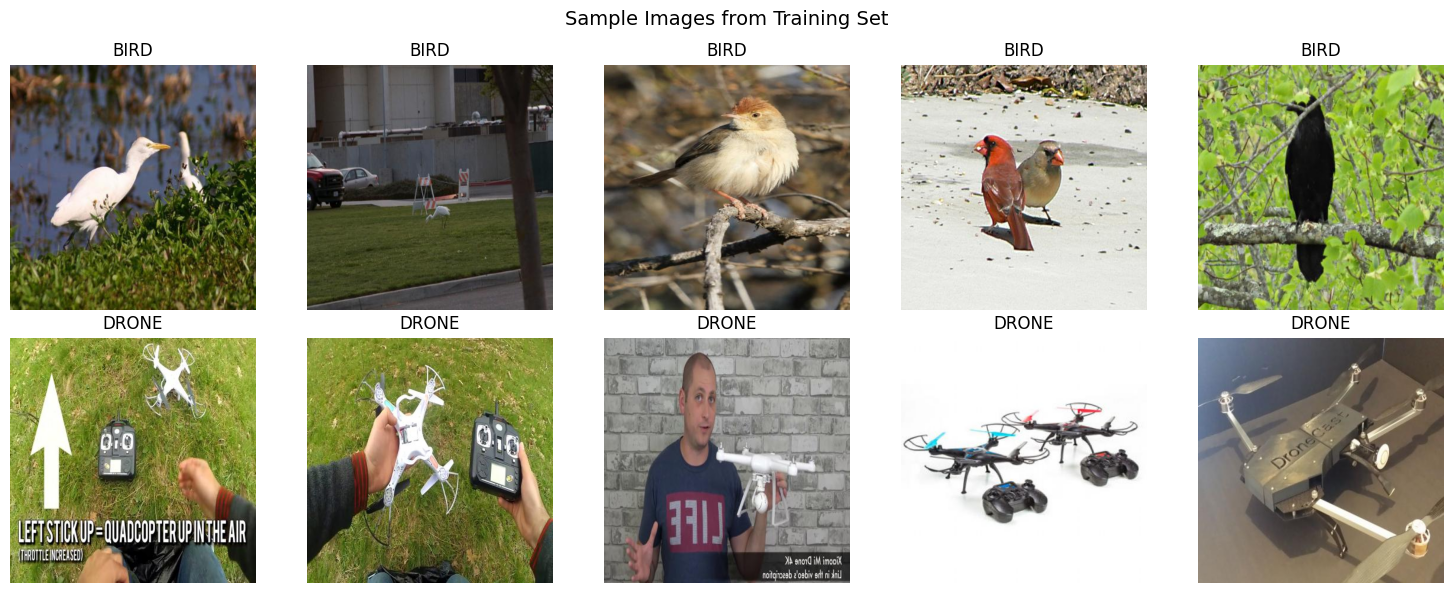

In [ ]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image

dataset_path = 'dataset'

fig, axes = plt.subplots(2, 5, figsize=(15, 6))

for i, cls in enumerate(['bird', 'drone']):
    img_folder = os.path.join(dataset_path, 'train', cls)
    images = random.sample(os.listdir(img_folder), 5)

    for j, img_name in enumerate(images):
        img_path = os.path.join(img_folder, img_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].set_title(f"{cls.upper()}")
        axes[i, j].axis('off')

plt.suptitle("Sample Images from Training Set", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Preprocessing: Only normalize pixel values to [0, 1]
# No augmentation here - just basic preprocessing
simple_datagen = ImageDataGenerator(rescale=1./255)

# Load data with preprocessing
train_data = simple_datagen.flow_from_directory(
    'dataset/train',
    target_size=IMG_SIZE,      # Resize all images to 224x224
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

valid_data = simple_datagen.flow_from_directory(
    'dataset/valid',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_data = simple_datagen.flow_from_directory(
    'dataset/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

# Summary
print("\n" + "=" * 50)
print("STEP 2: DATA PREPROCESSING COMPLETE")
print("=" * 50)
print(f"\n✅ Resized images to: {IMG_SIZE}")
print(f"✅ Normalized pixel values to: [0, 1]")
print(f"\nClass Indices: {train_data.class_indices}")
print(f"  - bird: 0")
print(f"  - drone: 1")

Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.

STEP 2: DATA PREPROCESSING COMPLETE

✅ Resized images to: (224, 224)
✅ Normalized pixel values to: [0, 1]

Class Indices: {'bird': 0, 'drone': 1}
  - bird: 0
  - drone: 1


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image parameters
IMG_SIZE = (224, 224)
BATCH_SIZE = 32

# Data Augmentation - Only 5 as per project requirement
train_datagen = ImageDataGenerator(
    rescale=1./255,                    # Normalize pixels
    rotation_range=20,                 # 1. Rotation
    horizontal_flip=True,              # 2. Flipping
    zoom_range=0.2,                    # 3. Zoom
    brightness_range=[0.8, 1.2],       # 4. Brightness
    width_shift_range=0.15,            # 5. Cropping effect (shifts image)
    height_shift_range=0.15,           # 5. Cropping effect (shifts image)
    fill_mode='nearest'
)

# Validation & Test - NO augmentation
valid_test_datagen = ImageDataGenerator(rescale=1./255)

# Create generators
train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=True
)

valid_generator = valid_test_datagen.flow_from_directory(
    'dataset/valid',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

test_generator = valid_test_datagen.flow_from_directory(
    'dataset/test',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False
)

print("✅ Data Augmentation Configured!")
print("\n5 Augmentations applied (as per project):")
print("  1. Rotation: 20°")
print("  2. Flipping: Horizontal")
print("  3. Zoom: 20%")
print("  4. Brightness: 80%-120%")
print("  5. Cropping: 15% shift")

Found 2662 images belonging to 2 classes.
Found 442 images belonging to 2 classes.
Found 215 images belonging to 2 classes.
✅ Data Augmentation Configured!

5 Augmentations applied (as per project):
  1. Rotation: 20°
  2. Flipping: Horizontal
  3. Zoom: 20%
  4. Brightness: 80%-120%
  5. Cropping: 15% shift


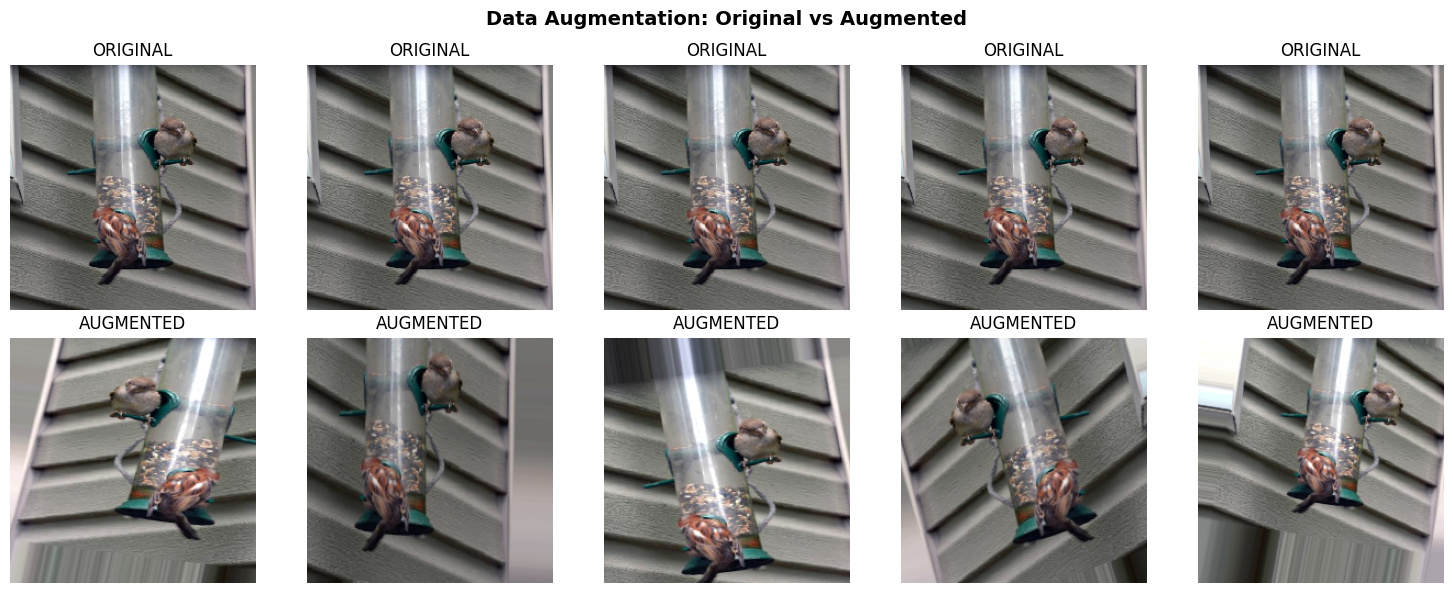


✅ Step 3: Data Augmentation Complete!


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import os

# Load one original image
sample_folder = 'dataset/train/bird'
sample_image_name = os.listdir(sample_folder)[0]
sample_image_path = os.path.join(sample_folder, sample_image_name)

# Load original image
original_img = load_img(sample_image_path, target_size=IMG_SIZE)
original_array = img_to_array(original_img) / 255.0

# Augmentation generator (same 5 augmentations)
augmented_datagen = ImageDataGenerator(
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    width_shift_range=0.15,
    height_shift_range=0.15,
    fill_mode='nearest'
)

# Prepare image for augmentation
img_array = img_to_array(original_img)
img_array = img_array.reshape((1,) + img_array.shape)

# Plot
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Row 1: Original
for i in range(5):
    axes[0, i].imshow(original_array)
    axes[0, i].set_title("ORIGINAL")
    axes[0, i].axis('off')

# Row 2: Augmented
aug_iter = augmented_datagen.flow(img_array, batch_size=1)
for i in range(5):
    aug_img = next(aug_iter)[0] / 255.0
    axes[1, i].imshow(aug_img)
    axes[1, i].set_title("AUGMENTED")
    axes[1, i].axis('off')

plt.suptitle("Data Augmentation: Original vs Augmented", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print("\n✅ Step 3: Data Augmentation Complete!")

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Input

# Build Custom CNN Model
def build_custom_cnn():
    model = Sequential([
        # Input Layer
        Input(shape=(224, 224, 3)),

        # Conv Block 1
        Conv2D(32, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Conv Block 2
        Conv2D(64, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Conv Block 3
        Conv2D(128, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Conv Block 4
        Conv2D(256, (3, 3), activation='relu', padding='same'),
        BatchNormalization(),
        MaxPooling2D((2, 2)),

        # Flatten
        Flatten(),

        # Dense Layers
        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.5),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        # Output Layer (Binary Classification)
        Dense(1, activation='sigmoid')
    ])

    return model

# Create model
cnn_model = build_custom_cnn()

# Compile model
cnn_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("✅ Custom CNN Model Built Successfully!")

✅ Custom CNN Model Built Successfully!


In [ ]:
# Display model architecture
cnn_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 224, 224, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 28, 28, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,270,209 (50.62 MB)

 Trainable params: 13,268,481 (50.62 MB)

 Non-trainable params: 1,728 (6.75 KB)

In [ ]:
from tensorflow.keras.applications import ResNet50, MobileNet, EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

# ============================================
# 1. ResNet50 Model
# ============================================
def build_resnet50():
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False  # Freeze base layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

resnet_model = build_resnet50()
resnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("✅ ResNet50 Model Built!")
print(f"   Total layers: {len(resnet_model.layers)}")
print(f"   Trainable layers: {sum([1 for l in resnet_model.layers if l.trainable])}")

# ============================================
# 2. MobileNet Model
# ============================================
def build_mobilenet():
    base_model = MobileNet(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False  # Freeze base layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

mobilenet_model = build_mobilenet()
mobilenet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\n✅ MobileNet Model Built!")
print(f"   Total layers: {len(mobilenet_model.layers)}")
print(f"   Trainable layers: {sum([1 for l in mobilenet_model.layers if l.trainable])}")

# ============================================
# 3. EfficientNetB0 Model
# ============================================
def build_efficientnet():
    base_model = EfficientNetB0(
        weights='imagenet',
        include_top=False,
        input_shape=(224, 224, 3)
    )
    base_model.trainable = False  # Freeze base layers

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)
    outputs = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    return model

efficientnet_model = build_efficientnet()
efficientnet_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("\n✅ EfficientNetB0 Model Built!")
print(f"   Total layers: {len(efficientnet_model.layers)}")
print(f"   Trainable layers: {sum([1 for l in efficientnet_model.layers if l.trainable])}")

# ============================================
# Summary
# ============================================
print("\n" + "=" * 50)
print("TRANSFER LEARNING MODELS SUMMARY")
print("=" * 50)
print("\nAll 3 models built with:")
print("  ✅ Pre-trained ImageNet weights")
print("  ✅ Frozen base layers (Fine-tuning)")
print("  ✅ Custom top layers (Dense + Dropout)")
print("  ✅ Sigmoid output (Binary Classification)")


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
✅ ResNet50 Model Built!
   Total layers: 181
   Trainable layers: 6
17225924/17225924 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

✅ MobileNet Model Built!
   Total layers: 92
   Trainable layers: 6
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

✅ EfficientNetB0 Model Built!
   Total layers: 244
   Trainable layers: 6

TRANSFER LEARNING MODELS SUMMARY

All 3 models built with:
  ✅ Pre-trained ImageNet weights
  ✅ Frozen base layers (Fine-tuning)
  ✅ Custom top layers (Dense + Dropout)
  ✅ Sigmoid output (Binary Classification)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
import time

# Create folder to save models
os.makedirs('saved_models', exist_ok=True)

# EarlyStopping - Stop training if no improvement
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Reduced epochs for CPU (change to 20 if using GPU)
EPOCHS = 20

print("=" * 50)
print("MODEL TRAINING STARTED (CPU Mode)")
print("=" * 50)
print(f"Epochs: {EPOCHS}")
print(f"EarlyStopping: patience=5")
print("=" * 50)

# ============================================
# 1. Train Custom CNN
# ============================================
print("\n[1/4] Training Custom CNN...")
cnn_checkpoint = ModelCheckpoint(
    'saved_models/custom_cnn_best.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

start_time = time.time()
cnn_history = cnn_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stopping, cnn_checkpoint],
    verbose=1
)
cnn_time = time.time() - start_time
print(f"✅ Custom CNN Complete! Time: {cnn_time/60:.2f} minutes")

# ============================================
# 2. Train ResNet50
# ============================================
print("\n[2/4] Training ResNet50...")
resnet_checkpoint = ModelCheckpoint(
    'saved_models/resnet50_best.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

start_time = time.time()
resnet_history = resnet_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stopping, resnet_checkpoint],
    verbose=1
)
resnet_time = time.time() - start_time
print(f"✅ ResNet50 Complete! Time: {resnet_time/60:.2f} minutes")

# ============================================
# 3. Train MobileNet
# ============================================
print("\n[3/4] Training MobileNet...")
mobilenet_checkpoint = ModelCheckpoint(
    'saved_models/mobilenet_best.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

start_time = time.time()
mobilenet_history = mobilenet_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stopping, mobilenet_checkpoint],
    verbose=1
)
mobilenet_time = time.time() - start_time
print(f"✅ MobileNet Complete! Time: {mobilenet_time/60:.2f} minutes")

# ============================================
# 4. Train EfficientNetB0
# ============================================
print("\n[4/4] Training EfficientNetB0...")
efficientnet_checkpoint = ModelCheckpoint(
    'saved_models/efficientnet_best.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

start_time = time.time()
efficientnet_history = efficientnet_model.fit(
    train_generator,
    epochs=EPOCHS,
    validation_data=valid_generator,
    callbacks=[early_stopping, efficientnet_checkpoint],
    verbose=1
)
efficientnet_time = time.time() - start_time
print(f"✅ EfficientNetB0 Complete! Time: {efficientnet_time/60:.2f} minutes")

# ============================================
# Training Summary
# ============================================
print("\n" + "=" * 50)
print("ALL MODELS TRAINED SUCCESSFULLY!")
print("=" * 50)

total_time = cnn_time + resnet_time + mobilenet_time + efficientnet_time

print(f"\nTraining Time:")
print(f"  Custom CNN:     {cnn_time/60:.2f} minutes")
print(f"  ResNet50:       {resnet_time/60:.2f} minutes")
print(f"  MobileNet:      {mobilenet_time/60:.2f} minutes")
print(f"  EfficientNetB0: {efficientnet_time/60:.2f} minutes")
print(f"  -------------------------")
print(f"  Total:          {total_time/60:.2f} minutes")

print("\nSaved models:")
print("  - saved_models/custom_cnn_best.keras")
print("  - saved_models/resnet50_best.keras")
print("  - saved_models/mobilenet_best.keras")
print("  - saved_models/efficientnet_best.keras")

MODEL TRAINING STARTED (CPU Mode)
Epochs: 20
EarlyStopping: patience=5

[1/4] Training Custom CNN...


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 510ms/step - accuracy: 0.6643 - loss: 0.6961
Epoch 1: val_loss improved from inf to 1.27302, saving model to saved_models/custom_cnn_best.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 61s 571ms/step - accuracy: 0.6647 - loss: 0.6953 - val_accuracy: 0.4910 - val_loss: 1.2730
Epoch 2/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step - accuracy: 0.7534 - loss: 0.5200
Epoch 2: val_loss did not improve from 1.27302
84/84 ━━━━━━━━━━━━━━━━━━━━ 37s 440ms/step - accuracy: 0.7534 - loss: 0.5200 - val_accuracy: 0.4910 - val_loss: 1.3353
Epoch 3/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 434ms/step - accuracy: 0.7796 - loss: 0.4590
Epoch 3: val_loss improved from 1.27302 to 0.89023, saving model to saved_models/custom_cnn_best.keras
84/84 ━━━━━━━━━━━━━━━━━━━━ 38s 454ms/step - accuracy: 0.7795 - loss: 0.4592 - val_accuracy: 0.6787 - val_loss: 0.8902
Epoch 4/20
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step - accuracy: 0.7921 - loss: 0.4506
Epoch 4: val_loss improved from 0.89023 to 0.65841, s

Getting predictions...


✅ Predictions Complete!

Custom CNN - METRICS
Accuracy:  90.70%
Precision: 90.22%
Recall:    88.30%
F1-Score:  89.25%

ResNet50 - METRICS
Accuracy:  78.14%
Precision: 86.15%
Recall:    59.57%
F1-Score:  70.44%

MobileNet - METRICS
Accuracy:  99.07%
Precision: 100.00%
Recall:    97.87%
F1-Score:  98.92%

EfficientNetB0 - METRICS
Accuracy:  56.28%
Precision: 0.00%
Recall:    0.00%
F1-Score:  0.00%

CLASSIFICATION REPORTS

--- Custom CNN ---
              precision    recall  f1-score   support

        Bird       0.91      0.93      0.92       121
       Drone       0.90      0.88      0.89        94

    accuracy                           0.91       215
   macro avg       0.91      0.90      0.91       215
weighted avg       0.91      0.91      0.91       215


--- ResNet50 ---
              precision    recall  f1-score   support

        Bird       0.75      0.93      0.83       121
       Drone       0.86      0.60      0.70        94

    accuracy                           0.78     

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_

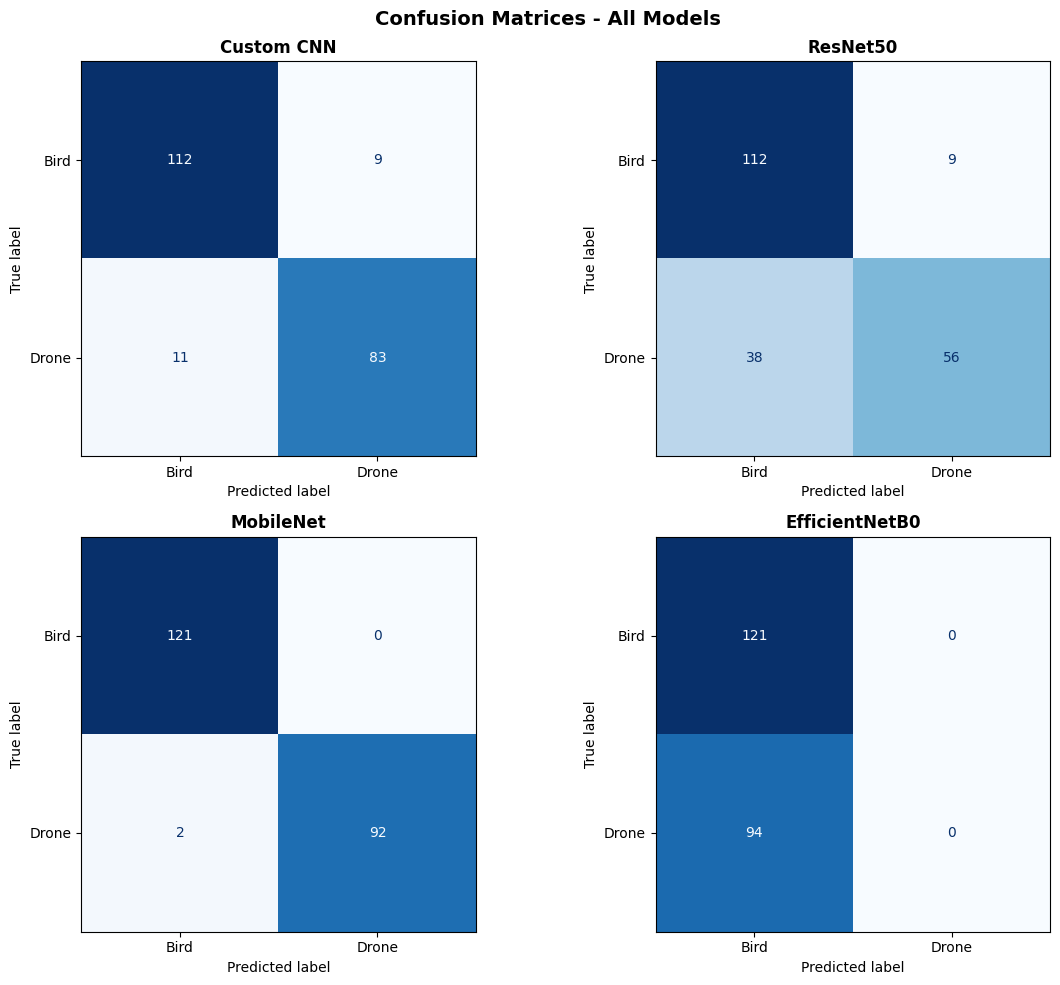


ACCURACY/LOSS GRAPHS


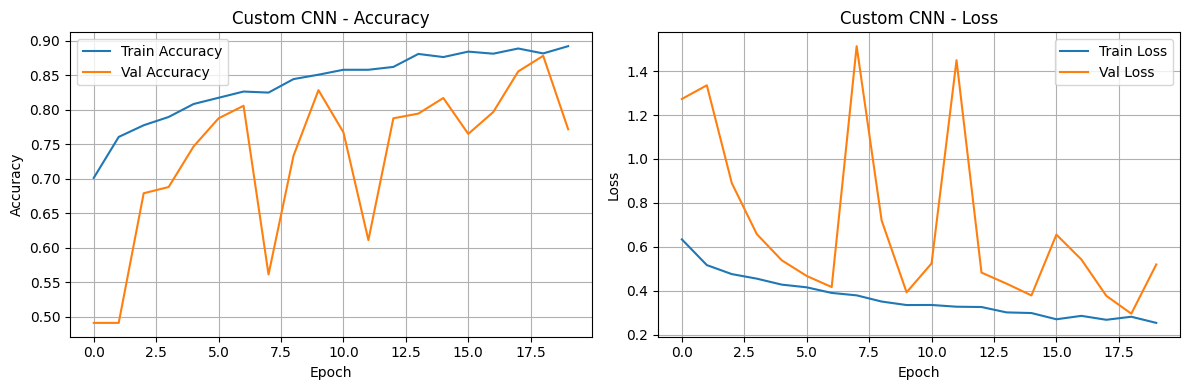

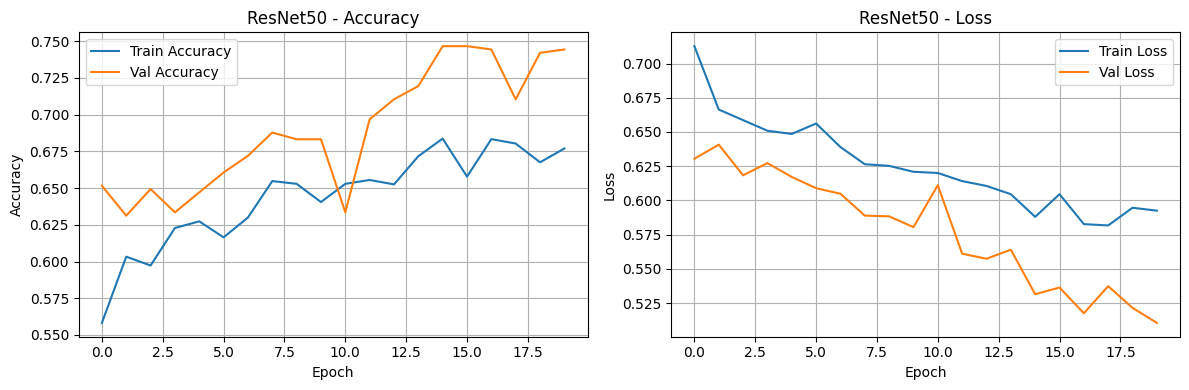

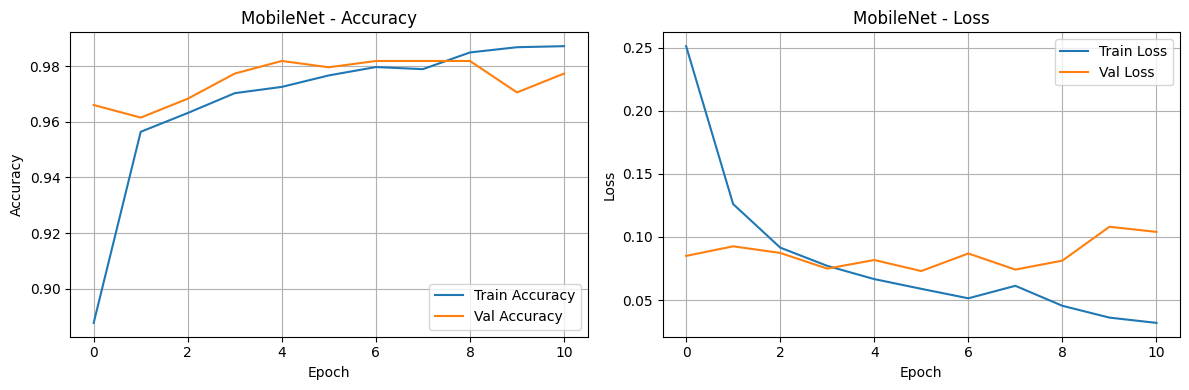

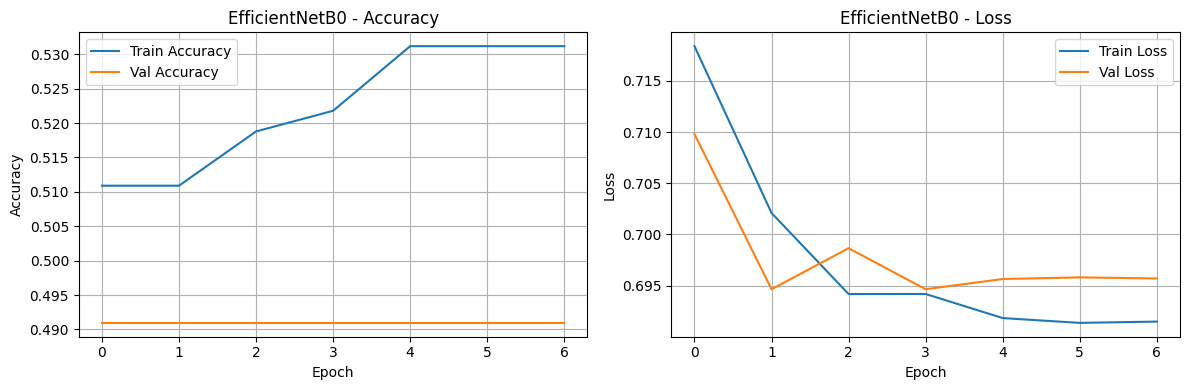


✅ Step 6: Model Evaluation Complete!


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# ============================================
# 1. Get Predictions for All Models
# ============================================

# Reset test generator
test_generator.reset()

# Get true labels
y_true = test_generator.classes

# Predictions for each model
print("Getting predictions...")

# Custom CNN
cnn_pred_prob = cnn_model.predict(test_generator, verbose=0)
cnn_pred = (cnn_pred_prob > 0.5).astype(int).flatten()

# ResNet50
resnet_pred_prob = resnet_model.predict(test_generator, verbose=0)
resnet_pred = (resnet_pred_prob > 0.5).astype(int).flatten()

# MobileNet
mobilenet_pred_prob = mobilenet_model.predict(test_generator, verbose=0)
mobilenet_pred = (mobilenet_pred_prob > 0.5).astype(int).flatten()

# EfficientNetB0
efficientnet_pred_prob = efficientnet_model.predict(test_generator, verbose=0)
efficientnet_pred = (efficientnet_pred_prob > 0.5).astype(int).flatten()

print("✅ Predictions Complete!")

# ============================================
# 2. Calculate Metrics for All Models
# ============================================

def calculate_metrics(y_true, y_pred, model_name):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred)
    rec = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print(f"\n{'='*50}")
    print(f"{model_name} - METRICS")
    print(f"{'='*50}")
    print(f"Accuracy:  {acc*100:.2f}%")
    print(f"Precision: {prec*100:.2f}%")
    print(f"Recall:    {rec*100:.2f}%")
    print(f"F1-Score:  {f1*100:.2f}%")

    return {'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1-Score': f1}

# Calculate metrics for all models
cnn_metrics = calculate_metrics(y_true, cnn_pred, "Custom CNN")
resnet_metrics = calculate_metrics(y_true, resnet_pred, "ResNet50")
mobilenet_metrics = calculate_metrics(y_true, mobilenet_pred, "MobileNet")
efficientnet_metrics = calculate_metrics(y_true, efficientnet_pred, "EfficientNetB0")

# ============================================
# 3. Classification Report for All Models
# ============================================

class_names = ['Bird', 'Drone']

print("\n" + "="*50)
print("CLASSIFICATION REPORTS")
print("="*50)

print("\n--- Custom CNN ---")
print(classification_report(y_true, cnn_pred, target_names=class_names))

print("\n--- ResNet50 ---")
print(classification_report(y_true, resnet_pred, target_names=class_names))

print("\n--- MobileNet ---")
print(classification_report(y_true, mobilenet_pred, target_names=class_names))

print("\n--- EfficientNetB0 ---")
print(classification_report(y_true, efficientnet_pred, target_names=class_names))

# ============================================
# 4. Confusion Matrix for All Models
# ============================================

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

models_pred = [
    (cnn_pred, "Custom CNN"),
    (resnet_pred, "ResNet50"),
    (mobilenet_pred, "MobileNet"),
    (efficientnet_pred, "EfficientNetB0")
]

for ax, (pred, name) in zip(axes.flat, models_pred):
    cm = confusion_matrix(y_true, pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(ax=ax, cmap='Blues', colorbar=False)
    ax.set_title(f"{name}", fontsize=12, fontweight='bold')

plt.suptitle("Confusion Matrices - All Models", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# ============================================
# 5. Accuracy/Loss Graphs
# ============================================

def plot_history(history, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Accuracy
    axes[0].plot(history.history['accuracy'], label='Train Accuracy')
    axes[0].plot(history.history['val_accuracy'], label='Val Accuracy')
    axes[0].set_title(f'{model_name} - Accuracy')
    axes[0].set_xlabel('Epoch')
    axes[0].set_ylabel('Accuracy')
    axes[0].legend()
    axes[0].grid(True)

    # Loss
    axes[1].plot(history.history['loss'], label='Train Loss')
    axes[1].plot(history.history['val_loss'], label='Val Loss')
    axes[1].set_title(f'{model_name} - Loss')
    axes[1].set_xlabel('Epoch')
    axes[1].set_ylabel('Loss')
    axes[1].legend()
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()

print("\n" + "="*50)
print("ACCURACY/LOSS GRAPHS")
print("="*50)

plot_history(cnn_history, "Custom CNN")
plot_history(resnet_history, "ResNet50")
plot_history(mobilenet_history, "MobileNet")
plot_history(efficientnet_history, "EfficientNetB0")

print("\n✅ Step 6: Model Evaluation Complete!")

MODEL COMPARISON REPORT
         Model  Test Accuracy (%)  Precision (%)  Recall (%)  F1-Score (%)  Training Time (min)
    Custom CNN              90.70          90.22       88.30         89.25                12.96
      ResNet50              78.14          86.15       59.57         70.44                13.30
     MobileNet              99.07         100.00       97.87         98.92                 7.05
EfficientNetB0              56.28           0.00        0.00          0.00                 5.16


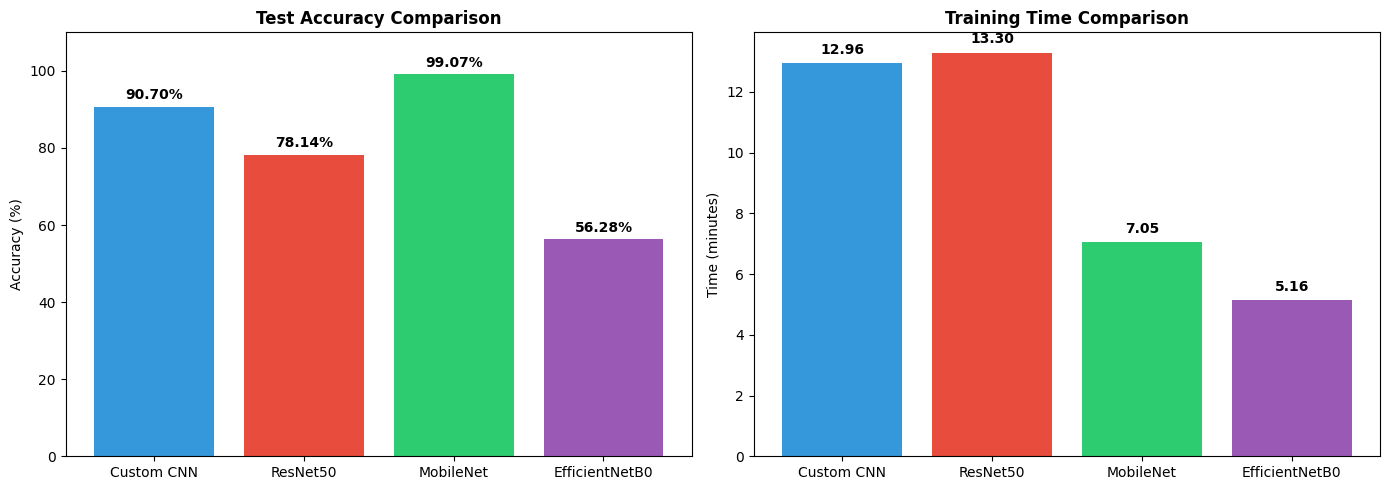

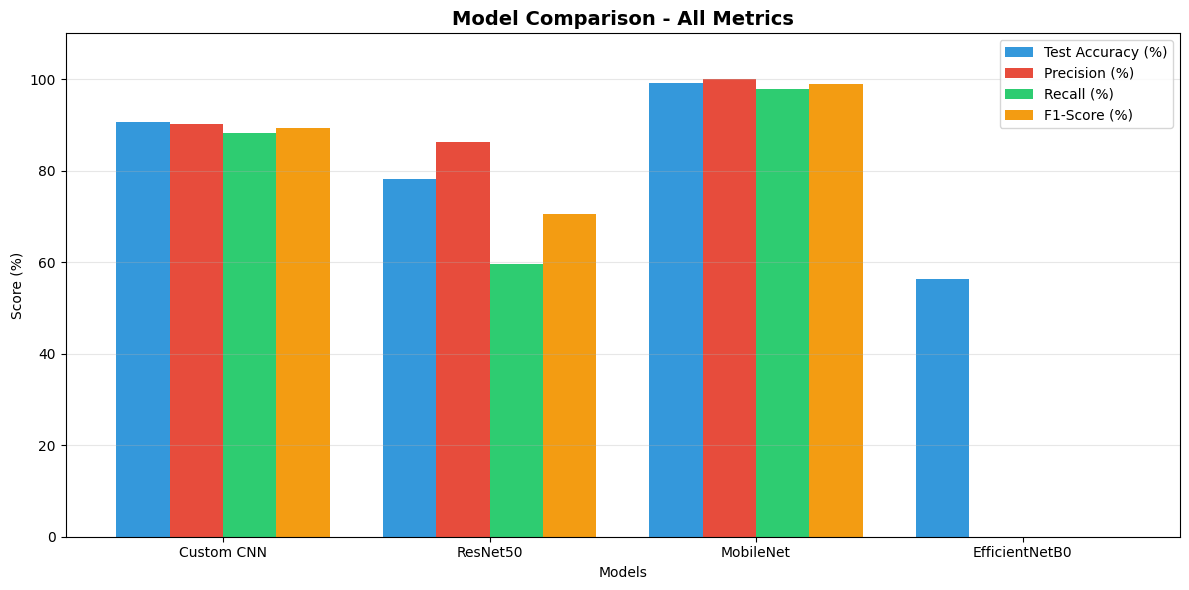


BEST MODEL SELECTION

🏆 BEST MODEL: MobileNet
   - Test Accuracy: 99.07%
   - Precision: 100.0%
   - Recall: 97.87%
   - F1-Score: 98.92%
   - Training Time: 7.05 minutes

MODEL SAVED FOR DEPLOYMENT

✅ Best model saved as: 'best_model.keras'
   This will be used for Streamlit deployment.

✅ Step 7: Model Comparison Complete!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ============================================
# 1. Create Comparison Table
# ============================================

comparison_data = {
    'Model': ['Custom CNN', 'ResNet50', 'MobileNet', 'EfficientNetB0'],
    'Test Accuracy (%)': [90.70, 78.14, 99.07, 56.28],
    'Precision (%)': [90.22, 86.15, 100.00, 0.00],
    'Recall (%)': [88.30, 59.57, 97.87, 0.00],
    'F1-Score (%)': [89.25, 70.44, 98.92, 0.00],
    'Training Time (min)': [12.96, 13.30, 7.05, 5.16]
}

comparison_df = pd.DataFrame(comparison_data)

print("=" * 70)
print("MODEL COMPARISON REPORT")
print("=" * 70)
print(comparison_df.to_string(index=False))

# ============================================
# 2. Visualize Comparison - Bar Chart
# ============================================

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

models = ['Custom CNN', 'ResNet50', 'MobileNet', 'EfficientNetB0']
colors = ['#3498db', '#e74c3c', '#2ecc71', '#9b59b6']

# Accuracy Comparison
accuracies = [90.70, 78.14, 99.07, 56.28]
bars1 = axes[0].bar(models, accuracies, color=colors)
axes[0].set_title('Test Accuracy Comparison', fontsize=12, fontweight='bold')
axes[0].set_ylabel('Accuracy (%)')
axes[0].set_ylim(0, 110)
for bar, acc in zip(bars1, accuracies):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2,
                 f'{acc:.2f}%', ha='center', fontweight='bold')

# Training Time Comparison
times = [12.96, 13.30, 7.05, 5.16]
bars2 = axes[1].bar(models, times, color=colors)
axes[1].set_title('Training Time Comparison', fontsize=12, fontweight='bold')
axes[1].set_ylabel('Time (minutes)')
for bar, t in zip(bars2, times):
    axes[1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
                 f'{t:.2f}', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================
# 3. All Metrics Comparison
# ============================================

fig, ax = plt.subplots(figsize=(12, 6))

x = np.arange(len(models))
width = 0.2

metrics = ['Test Accuracy (%)', 'Precision (%)', 'Recall (%)', 'F1-Score (%)']
values = [
    [90.70, 78.14, 99.07, 56.28],  # Accuracy
    [90.22, 86.15, 100.00, 0.00],  # Precision
    [88.30, 59.57, 97.87, 0.00],   # Recall
    [89.25, 70.44, 98.92, 0.00]    # F1-Score
]

colors_metrics = ['#3498db', '#e74c3c', '#2ecc71', '#f39c12']

for i, (metric, val) in enumerate(zip(metrics, values)):
    bars = ax.bar(x + i*width, val, width, label=metric, color=colors_metrics[i])

ax.set_xlabel('Models')
ax.set_ylabel('Score (%)')
ax.set_title('Model Comparison - All Metrics', fontsize=14, fontweight='bold')
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(models)
ax.legend(loc='upper right')
ax.set_ylim(0, 110)
ax.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================
# 4. Best Model Selection
# ============================================

print("\n" + "=" * 70)
print("BEST MODEL SELECTION")
print("=" * 70)

best_idx = comparison_df['Test Accuracy (%)'].idxmax()
best_model = comparison_df.loc[best_idx, 'Model']
best_accuracy = comparison_df.loc[best_idx, 'Test Accuracy (%)']

print(f"\n🏆 BEST MODEL: {best_model}")
print(f"   - Test Accuracy: {best_accuracy}%")
print(f"   - Precision: {comparison_df.loc[best_idx, 'Precision (%)']}%")
print(f"   - Recall: {comparison_df.loc[best_idx, 'Recall (%)']}%")
print(f"   - F1-Score: {comparison_df.loc[best_idx, 'F1-Score (%)']}%")
print(f"   - Training Time: {comparison_df.loc[best_idx, 'Training Time (min)']} minutes")

# ============================================
# 5. Save Best Model for Streamlit
# ============================================

import shutil

# Copy best model for deployment
shutil.copy('saved_models/mobilenet_best.keras', 'best_model.keras')

print("\n" + "=" * 70)
print("MODEL SAVED FOR DEPLOYMENT")
print("=" * 70)
print("\n✅ Best model saved as: 'best_model.keras'")
print("   This will be used for Streamlit deployment.")

print("\n✅ Step 7: Model Comparison Complete!")

In [ ]:
!pip install streamlit

In [ ]:
%%writefile app.py
app_code = '''
import streamlit as st
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

st.set_page_config(page_title="Aerial Object Detection", page_icon="🛸", layout="centered")

@st.cache_resource
def load_trained_model():
    model = load_model('best_model.keras')
    return model

model = load_trained_model()

st.title("🛸 Aerial Object Classification")
st.markdown("### Classify images as **Bird** or **Drone**")
st.markdown("---")

st.markdown("#### Upload an Image")
uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

def predict(img):
    img = img.resize((224, 224))
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    prediction = model.predict(img_array, verbose=0)
    confidence = prediction[0][0]
    if confidence > 0.5:
        predicted_class = "Drone"
        conf_score = confidence * 100
    else:
        predicted_class = "Bird"
        conf_score = (1 - confidence) * 100
    return predicted_class, conf_score

if uploaded_file is not None:
    img = Image.open(uploaded_file)
    st.image(img, caption="Uploaded Image", use_container_width=True)
    if st.button("🔍 Classify Image"):
        with st.spinner("Analyzing..."):
            predicted_class, confidence = predict(img)
        st.markdown("---")
        st.markdown("### 📊 Prediction Result")
        if predicted_class == "Bird":
            st.success(f"**Prediction: 🐦 {predicted_class}**")
        else:
            st.warning(f"**Prediction: 🛸 {predicted_class}**")
        st.info(f"**Confidence: {confidence:.2f}**")
        st.progress(int(confidence))
'''

with open('app.py', 'w') as f:
    f.write(app_code)

print("✅ app.py updated!")

Overwriting app.py


In [ ]:
# --- Colab Streamlit + Cloudflared Setup ---

# 1️⃣ Install dependencies
!pip install streamlit pandas requests --quiet

# 2️⃣ Download and install cloudflared
!wget -q https://github.com/cloudflare/cloudflared/releases/latest/download/cloudflared-linux-amd64.deb
!dpkg -i cloudflared-linux-amd64.deb

# 3️⃣ Kill any old processes
!pkill -f streamlit
!pkill -f cloudflared

# 4️⃣ Run Streamlit app in background and log output
!nohup streamlit run app.py --server.port 8501 --server.headless true > log.txt 2>&1 &

import time
print("⏳ Waiting 10 seconds for Streamlit to start...")
time.sleep(10)

# 5️⃣ Check if Streamlit is running
!tail -n 20 log.txt

# 6️⃣ Start Cloudflared tunnel (after Streamlit is up)
!cloudflared tunnel --url http://localhost:8501 --no-autoupdate

(Reading database ... 121717 files and directories currently installed.)
Preparing to unpack cloudflared-linux-amd64.deb ...
Unpacking cloudflared (2025.11.1) over (2025.11.1) ...
Setting up cloudflared (2025.11.1) ...
Processing triggers for man-db (2.10.2-1) ...
⏳ Waiting 10 seconds for Streamlit to start...



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8501
  Network URL: http://172.28.0.12:8501
  External URL: http://35.227.189.20:8501

2025-11-22T20:29:30Z INF Thank you for trying Cloudflare Tunnel. Doing so, without a Cloudflare account, is a quick way to experiment and try it out. However, be aware that these account-less Tunnels have no uptime guarantee, are subject to the Cloudflare Online Services Terms of Use (https://www.cloudflare.com/website-terms/), and Cloudflare reserves the right to investigate your use of Tunnels for violations of such terms. If you intend to use Tunnels in production you should use a pre-created named tunne